In [2]:
import os
import pandas as pd
import numpy as np

In [53]:
os.chdir("../../tests/geneticdata")
files = os.listdir()
for i, f in enumerate(files):
    print(i, f)

0 GeneticData_-_3.txt
1 GeneticData_-_2.txt
2 GeneticData_-_1.txt
3 GeneticData_-_5.txt
4 GeneticData_-_4.txt
5 GeneticData_-_6.txt
6 GeneticData_-_7.txt
7 rename_files.py
8 GeneticData_-_9.txt
9 GeneticData_-_8.txt


In [145]:
input_file = files[4]
chromo_name = "mtDNA"
output_file = "output_file.tsv"

with open(input_file, "rb") as f:
    i = 0
    chromo_line = None
    data_list = []
    while True:
        line_b = f.readline()
        line = str(line_b)
        if chromo_name in line:
            chromo_line = i + 1
        if i == chromo_line:
            data_list.append(line[2:line.find("\\")])
        i += 1
        if not line_b:
            break

data = np.array(data_list)

seq_lens = []
for seq in data:
    seq_lens.append(len(seq))
    
if len(np.unique(seq_lens)) > 1:
    # TODO: throw error
    pass
else:
    positions = seq_lens[0]

with open(output_file, "w") as f:
    f.write("\t".join(output_header) + "\n")
    
for p in range(positions):
    nucleotides = []
    for seq in data:
        if seq[p].upper() in "ACGT":
            nucleotides.append(seq[p].upper())
    if nucleotides.count(nucleotides[0]) < len(nucleotides):
        alleles = set(nucleotides)
        freqs = {}
        for a in alleles:
            freqs[a] = nucleotides.count(a)
        ma = max(freqs, key=freqs.get)
        mi = min(freqs, key=freqs.get)
        maf = freqs[mi] / sum(freqs[a] for a in alleles)
        row = "\t".join([chromo_name, str(p), "/".join(alleles), str(ma), str(mi), str(round(maf, 2))]) + "\n"
        with open(output_file, "a") as f:
            f.write(row)

In [15]:
x = [1, 1, 1, 2]
x = set(x)
print(len(x))

2


In [36]:
x = "A/AaaaaaA/Aa"
i = len(x) - x[::-1].find("/")
print(x[i:])
print(os.getcwd())

Aa
/Users/otodreas/Lund/Courses/MiscExercisesBINP16/RunningExercise3_BINP16/src/partiiiprograms


In [15]:
x = {'A': 10, 'B': 3, 'C': 3}
ma = max(x, key=x.get)
mi = min(x, key=x.get)
print(ma, mi)
print(list(x.values()).count(min(x.values())))
#for val in [ma, mi]:
    #key = x.get(val)
 #   print(key)

A B
2


In [17]:
x = {'A': 10, 'B': 3, 'C': 3}
ma = max(x, key=x.get)
mi = min(x, key=x.get)

import random

ma = []
mi = []
for item in x.items():
    if item[1] == min(list(x.values())):
        mi.append(item[0])
    elif item[1] == max(list(x.values())):
        ma.append(item[0])
ma = random.choice(ma)
mi = random.choice(mi)

('A', 10)
('B', 3)
('C', 3)


In [26]:
random.seed(0)
print(type(random.choice(['B'])))

<class 'str'>


In [36]:
x = ['a', 'b', 'c']
popper = 'd'
x.pop(x.index(popper)) if popper in x else x
print(x)

['a', 'b', 'c']


## dendogram

link to dendogram script below: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

In [ ]:
# exact copy of code from link
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Help on Bunch in module sklearn.utils._bunch object:

class Bunch(builtins.dict)
 |  Bunch(**kwargs)
 |
 |  Container object exposing keys as attributes.
 |
 |  Bunch objects are sometimes used as an output for functions and methods.
 |  They extend dictionaries by enabling values to be accessed by key,
 |  `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
 |
 |  Examples
 |  --------
 |  >>> from sklearn.utils import Bunch
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __dir__(self)
 |      Default dir() implementation.
 |
 |  __getattr__(self, key)
 |
 |  __getitem__(self, key)
 |      Return self[key].
 |
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  __setattr__(self, key, value)
 |      Implem

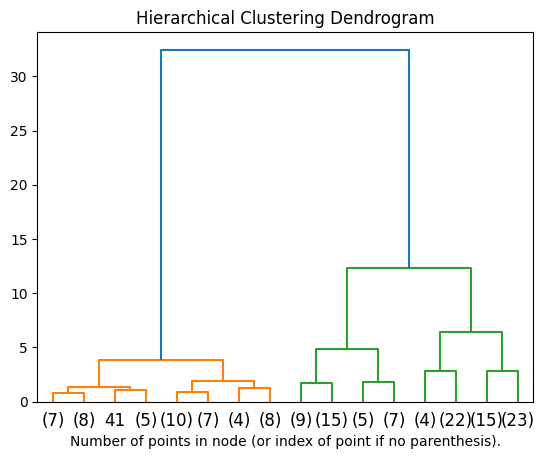

In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data
help(iris)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)

print(type(model))
print(model.n_clusters_, "in this case equivalent to number of labels")
print(model.labels_)
print(model.n_leaves_, "equivalent to number of labels")
help(model)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()